### Notes issue de ce cour youtube : 
https://www.youtube.com/watch?v=zZkNOdBWgFQ

#### Utiliser le doc associer pour pratiquer : 'titanic3.xls'

#### Librairies abrodé : 
- pandas
- numpy
- matplotlib

#### Les functions abordée de pandas:
- head()  
- drop() 
- describe() 
- dropna()  
- value_counts()  
- groupby()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Stock dans une variable data -> la lecture du fichier excel par pandas

In [6]:
data = pd.read_excel('titanic3.xls')

##### Return : ligne,columns

In [7]:
data.shape

(1309, 14)

##### Return les colonnes

In [8]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

##### Return les premières lignes

In [9]:
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

Attention à executer le block qui suit une seul fois.
On ne peut pas drop des colonnes qui n'existe plus, car déja dropé une première fois, sinon ca renvois une erreur.
'drop' est la fonction qui permet de supprimer les colonnes désiré. 
Le therme 'axis=1' signifie les colonnes, du coup 'axis=0' serrais pour les lignes.
Le terminal ne renvoie rien, c'est normal.

In [10]:
data = data.drop(['sibsp', 'parch', 'ticket', 'fare' ,'cabin' ,'embarked' ,'boat' ,'body' ,'home.dest'], axis=1)

##### Si je regarde le résultat avec la commande qui suit (vue plus haut) on vois qu'il reste peut de colonnes.

In [11]:
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  
0  29.0000  
1   0.9167  
2   2.0000  
3  30.0000  
4  25.0000

La fonction '.describe()' renvoi les stats de base pour chaques colonnes.
mean = moyenne d'age par exemple.

Dans count, on peut voir qu'il manque des données dans la colonnes age, 
car le nombre d'age < nombre de survivant.

In [12]:
data.describe()

pclass     survived          age
count  1309.000000  1309.000000  1046.000000
mean      2.294882     0.381971    29.881135
std       0.837836     0.486055    14.413500
min       1.000000     0.000000     0.166700
25%       2.000000     0.000000    21.000000
50%       3.000000     0.000000    28.000000
75%       3.000000     1.000000    39.000000
max       3.000000     1.000000    80.000000

##### 2 options possible pour pallier à cela:

- Option 1 -> remplacer les données manquantes, par des valeurs par défaut avec '.fillna()', qui va générer des valeurs aléatoir.
La je dit 'Je remplace les données manquante par l'age moyen' Mais cela corrompt la data pour l'analyse. Il faudras garder cela à l'esprit lors de l'interprétation.

In [13]:
data.fillna(data['age'].mean())

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex        age  
0     female  29.000000  
1       male   0.916700  
2     female   2.000000  
3       male  30.000000  
4     female  25.000000  
...      ...        ...  
1304  female  14.500000  
1305  female  29.881135  
1306    male  26.500000  
1307    male  27.000000  
1308    male  29.000000  

[1309 rows x 5 columns]

- Option 2 -> supprimer les lignes dans lequels il manque des datas.
Parfois, mieux vaux suprimer de données fausse que de corompre le jeu.
('axis=0' pour spécifier l'axe ou je veux éliminer la data.)

In [155]:
data = data.dropna(axis=0) 

Avec data.describe, on vois que la ligne 'count' à maintenant bien toute ses valeurs égale, 
donc pas de données manquante.
Mais ca impact aussi le resultat des states final, vu que les données on changée.

In [14]:
data.describe()

pclass     survived          age
count  1309.000000  1309.000000  1046.000000
mean      2.294882     0.381971    29.881135
std       0.837836     0.486055    14.413500
min       1.000000     0.000000     0.166700
25%       2.000000     0.000000    21.000000
50%       3.000000     0.000000    28.000000
75%       3.000000     1.000000    39.000000
max       3.000000     1.000000    80.000000

##### Je veux des stats sur les passagers en 1e, 2e, et 3e classe. J'utilise la fonction 'value_counts()'

In [15]:
data['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

Déjà, à partir de cela, je peut créer un graphe avec une fonction de la librarie 'matplotlib', qui fonctionne associée à pandas.

Je selectionne la colonnes des différentes classes des passagés (pas 'class') + Je select la valeur totale de chaqu'une de pandas + la fonction bar de matplotlib pour un graphique bar 
(il existe aussi .plot, ou hist(bins=...), ou plot.scatter(x=...,y=...) etc):

In [16]:
data['pclass'].value_counts().plot.bar()

<AxesSubplot:>

##### Je peut aussi ajouter de la precision dans ma requette. Par exemple demander que les personnes mineur, toujours en répartition dans les classes:

In [23]:
data[data['age'] < 18]['pclass'].value_counts() 

3    106
2     33
1     15
Name: pclass, dtype: int64

##### Je peut aussi le faire sur 2 metriques avec .groupby()

In [24]:
data[data['age'] < 18].groupby(['sex', 'pclass']).mean() 

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

##### Autre exemple de graphique avec un histogramme, pour voir les moyennes d'age des gens devenu des glacons:

<AxesSubplot:>

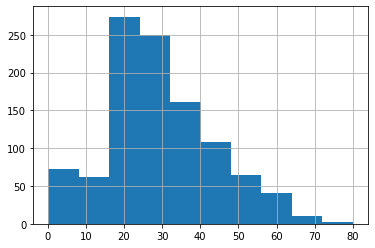

In [17]:
data['age'].hist()

##### Exemple de la function groupby() -> (.mean = moyenne)

In [18]:
data.groupby(['sex']).mean()

pclass  survived        age
sex                                  
female  2.154506  0.727468  28.687071
male    2.372479  0.190985  30.585233

On peut le faire avec 2 metriques:

In [19]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.965278  37.037594
       2       0.886792  27.499191
       3       0.490741  22.185307
male   1       0.340782  41.029250
       2       0.146199  30.815401
       3       0.152130  25.962273

Plus de détails sur les datafram.
(à 10:10 de la vidéo)
Il y a 2 structures de données dans pandas : 'les dataFrams' et 'les séries'
Une série étant = colonnes dans un dataframe.
Plusieurs séries les une à coté de autres = un datafram.
Une séries = un tableau numpy à une dimenssion + une colonnes d'index.

C'est pour cela que si on print: "data['age']" cela renvoi au moins deux colonnes:
Une colonnes pour la valeur + une calonnes pour l'index associée.


In [20]:
data['name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

Du coup, je peut pourquoi pas remplacer la colonne d'index 
par les noms des futures 'human ice-cube':
(A executer qu'une seul fois aussi, ou alors ré-éxecuter depuis les codes début)

In [21]:
data = data.set_index('name')
data['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

##### On peut donc assembler des séries entre elles si elle partagent le meme index. 
(Ou autrement dit, le meme axe)

Ceci dit, ont peut dire qu'un dataframe = un dictionnaire qui contient des séries.
- Dictionnaire = association -> clefs    - valeurs
- DataFrame    = association -> colonnes - séries

Comprendre les opérations d'indexing et de slicing.
À retenir:
- data['age'][0:10]
est composé : d'une série + un index (l'indexing):

- ['age'] = La série
- [0:10] = l'indexing sur le tableau numpy de cette série
reprendre à 12:30